In [1]:
#Imports
import pandas as pd
import numpy as np
import datetime as dt

#Plotting imports
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt


#Sqlalchemy imports
import sqlalchemy
from sqlalchemy import Column, Float, Integer, String, DateTime, Text
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func, MetaData

In [2]:
#Create engine and link inspector
engine = create_engine("sqlite:///hawaii.sqlite")
inspector = inspect(engine)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurements', 'stations']

In [5]:
Stations = Base.classes.stations
Measurements = Base.classes.measurements

session = Session(engine)

In [16]:
# Query + Plot Last 12 months of preciptation data
    # Max date is 2016-08-23
from sqlalchemy import and_
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= "2016-08-23").all()
df = pd.DataFrame(results)
df.set_index("date", inplace = True)
df = df.rename(columns={'prcp': 'precipitation'})

In [20]:
df.head(5)

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [21]:
df.tail(5)

,precipitation
date,
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56
2017-08-22,0.50
2017-08-23,0.45


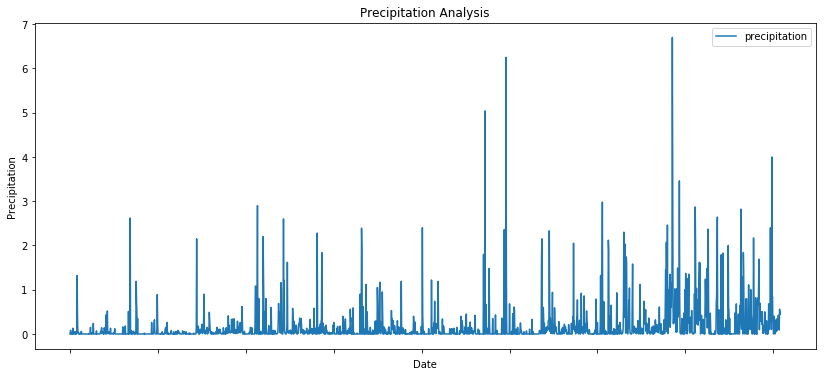

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize = (14,6))
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.title('Precipitation Analysis')
plt.show()

In [24]:
# Describe Preciptation Datausing describe() func
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Total number of stations:
stations_count = session.query(Stations.station).group_by(Stations.station).count()
print(stations_count)

In [ ]:
# Alt. method/query to obtain total number of unique stations:
#session.query(func.count(Stations.station)).all()

In [ ]:
# Most active stations, listed in descending order:
active_station_count = session.query(Stations.name, Measurements.station, func.count(Measurements.tobs))\
.filter(Stations.station == Measurements.station)\
.group_by(Measurements.station)\
.order_by(func.count(Measurements.tobs).desc()).all()

active_station_count